In [1]:
# This notebook performs initial data exploration and visualization of the BraTS 2025 dataset.
# We visualize multiple MRI modalities (t1n, t1c, t2w, t2f) and segmentation labels to understand structure and volume layout.

THE TRAINING DATASET
BraTS2025-GLI-PRE-Challenge-TrainingData

In [1]:
import os
import sys
from pathlib import Path
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import glob

# Set inline plotting
%matplotlib inline

In [7]:
# Define path to training data
BRATS_TRAIN_PATH = Path(r"C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS2025-GLI-PRE-Challenge-TrainingData")

# We confirm contents of root path
print("Root contains:", list(BRATS_TRAIN_PATH.iterdir()))

Root contains: [WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS-GLI-00000-000'), WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS-GLI-00002-000'), WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS-GLI-00003-000'), WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS-GLI-00005-000'), WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS-GLI-00006-000'), WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS-GLI-00008-000'), WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-

In [10]:
# List all patient directories
patients = sorted(BRATS_TRAIN_PATH.glob("BraTS-GLI-*"))
print(f"Found {len(patients)} patient folders")

Found 1251 patient folders


In [14]:
# Show first 5 patient folder names
for p in patients[:5]:
    print(p.name)

BraTS-GLI-00000-000
BraTS-GLI-00002-000
BraTS-GLI-00003-000
BraTS-GLI-00005-000
BraTS-GLI-00006-000


In [16]:
# Select a patient
assert len(patients) > 0, "No patient folders found"
example_patient = patients[0]

# List modalities and segmentation
modalities = ["t1n", "t1c", "t2w", "t2f"]
images = {}
for mod in modalities:
    f = example_patient / f"{example_patient.name}-{mod}.nii.gz"
    images[mod] = nib.load(str(f)).get_fdata()
label = nib.load(str(example_patient / f"{example_patient.name}-seg.nii.gz")).get_fdata()

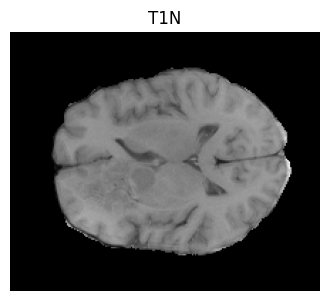

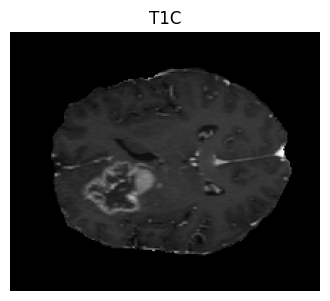

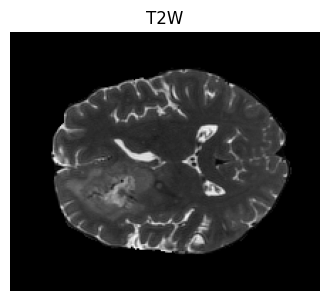

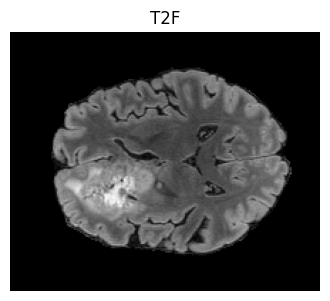

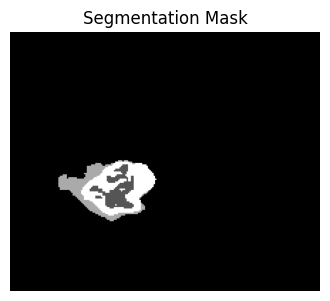

In [17]:
# Plot image slices 
def plot_slice(data, title, slice_idx=80):
    plt.figure(figsize=(4, 4))
    plt.imshow(data[:, :, slice_idx], cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
    
# Plot a few modalities
slice_idx = images['t1n'].shape[2] // 2
for mod in modalities:
    plot_slice(images[mod], title=mod.upper(), slice_idx=slice_idx)

# Plot segmentation
plot_slice(label, title="Segmentation Mask", slice_idx=slice_idx)


In [18]:
# Summarize statistics
print("Image shape:", images['t1n'].shape)
print("Unique label values:", np.unique(label))

Image shape: (182, 218, 182)
Unique label values: [0. 1. 2. 3.]


In [19]:
# Check if all files exist
missing = []
for patient in patients:
    for mod in modalities + ["seg"]:
        fname = patient / f"{patient.name}-{mod}.nii.gz"
        if not fname.exists():
            missing.append(str(fname))

if missing:
    print(f"Missing {len(missing)} files:")
    for f in missing[:10]:
        print("-", f)
else:
    print(" All modality and segmentation files found for all patients.")

 All modality and segmentation files found for all patients.


THE VALIDATION DATASET
BraTS2025-GLI-PRE-Challenge-ValidationData

In [22]:
# Define path to Validation data
BRATS_VALID_PATH = Path(r"C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS2025-GLI-PRE-Challenge-ValidationData")

# We confirm contents of root path
print("Root contains:", list(BRATS_VALID_PATH.iterdir()))

Root contains: [WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS-GLI-00001-000'), WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS-GLI-00001-001'), WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS-GLI-00013-000'), WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS-GLI-00013-001'), WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS-GLI-00015-000'), WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS-GLI-00015-001'), WindowsPath('C:/Users/user/NeuroSegNet/dat

In [10]:
# List all patient directories
patients = sorted(BRATS_VALID_PATH.glob("BraTS-GLI-*"))
print(f"Found {len(patients)} patient folders")

Found 219 patient folders


In [23]:
# Show first 5 patient folder names
for p in patients[:5]:
    print(p.name)

BraTS-GLI-00000-000
BraTS-GLI-00002-000
BraTS-GLI-00003-000
BraTS-GLI-00005-000
BraTS-GLI-00006-000


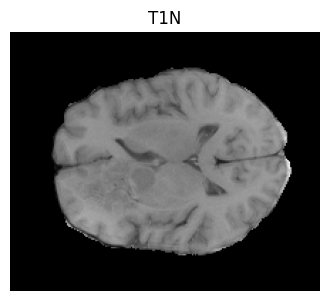

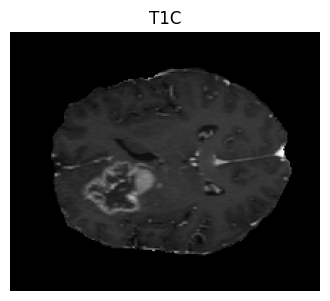

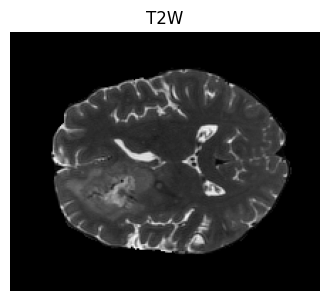

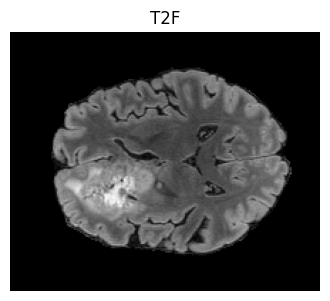

In [25]:
# Select a patient
assert len(patients) > 0, "No patient folders found"
val_patient = patients[0]

# List modalities and segmentation
modalities = ["t1n", "t1c", "t2w", "t2f"]
val_images = {}
for mod in modalities:
    f = val_patient / f"{val_patient.name}-{mod}.nii.gz"
    val_images[mod] = nib.load(str(f)).get_fdata()

# Note the validation cases have no "-seg.nii.gz" files or ground truth files as found in the training data.


# Plot image slices 
def plot_slice(data, title, slice_idx=80):
    plt.figure(figsize=(4, 4))
    plt.imshow(data[:, :, slice_idx], cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
    
# Plot a few modalities
slice_idx = images['t1n'].shape[2] // 2
for mod in modalities:
    plot_slice(images[mod], title=mod.upper(), slice_idx=slice_idx)

In [26]:
# Check if all files exist
missing = []
for patient in patients:
    for mod in modalities :
        fname = patient / f"{patient.name}-{mod}.nii.gz"
        if not fname.exists():
            missing.append(str(fname))

if missing:
    print(f"Missing {len(missing)} files:")
    for f in missing[:10]:
        print("-", f)
else:
    print(" All modality and segmentation files found for all patients.")

 All modality and segmentation files found for all patients.
